In [1]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tqdm import tqdm
 


In [2]:
df = pd.read_csv('/Users/jerryliu/Documents/Vu_uva/p5/data_mining/assignment1/dataset_mood_smartphone.csv')


In [3]:
df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [3]:
df.time = pd.to_datetime(df.time)
df.drop(['Unnamed: 0','id'],axis = 1, inplace=True)



In [4]:
df = df.groupby(['time','variable']).mean()

In [5]:
df = df.unstack(1)

In [6]:
df.columns = df.columns.map(lambda x:x[1])

In [7]:
df.reset_index(inplace=True)
df.index = df.time.dt.strftime('%Y-%m-%d')
df.drop('time',axis = 1, inplace = True)
df = df.groupby(['time']).mean()


In [8]:
df

,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
time,,,,,,,,,,,,,,,,,,,
2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-05,0.152343,13.994216,25.914081,NaN,NaN,NaN,NaN,9.4720,19.107111,75.245667,NaN,NaN,NaN,1.0,0.0,1.0,7.0,40.196424,NaN
2014-06-06,0.189476,6.568736,38.884636,NaN,NaN,NaN,NaN,9.1035,NaN,NaN,NaN,2.072,NaN,1.0,0.5,1.0,7.5,47.953193,NaN
2014-06-07,0.081893,125.687450,27.257963,NaN,NaN,NaN,NaN,6.2140,53.425000,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,8.0,128.613442,1.0


# calculate correlation between variables

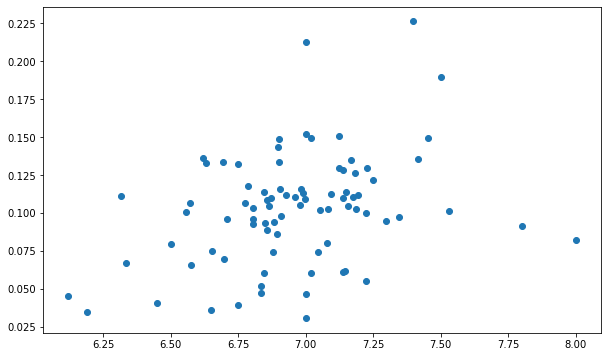

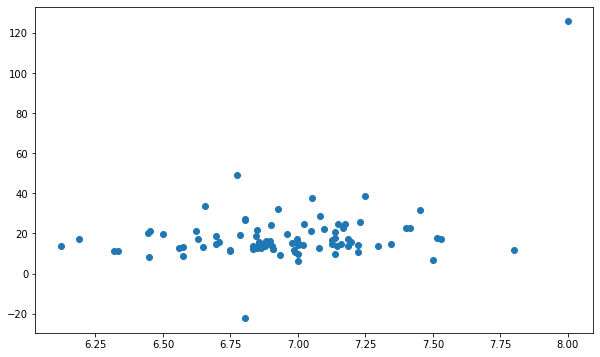

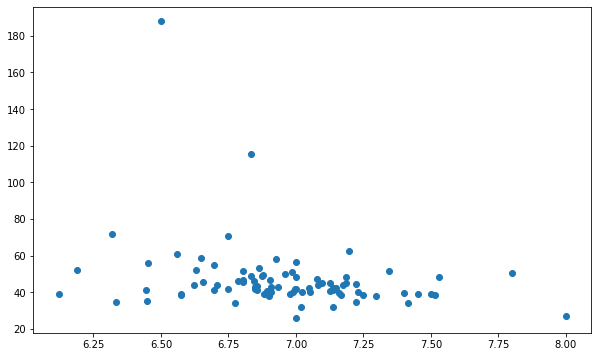

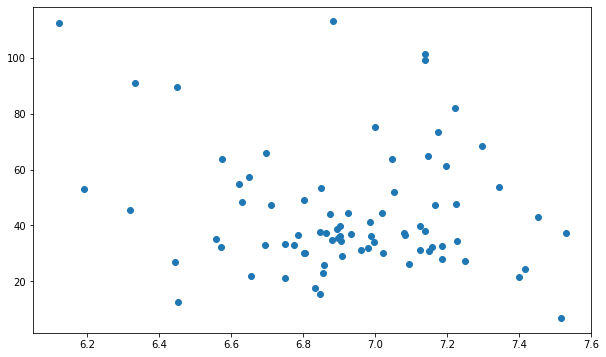

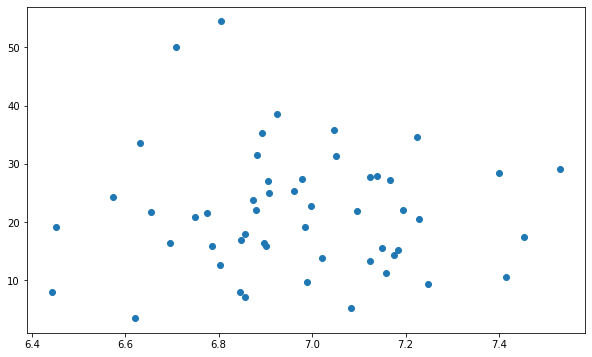

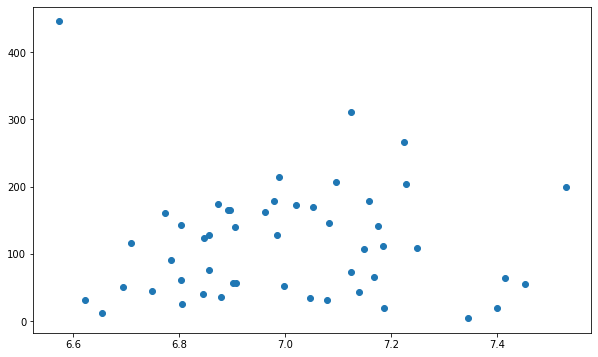

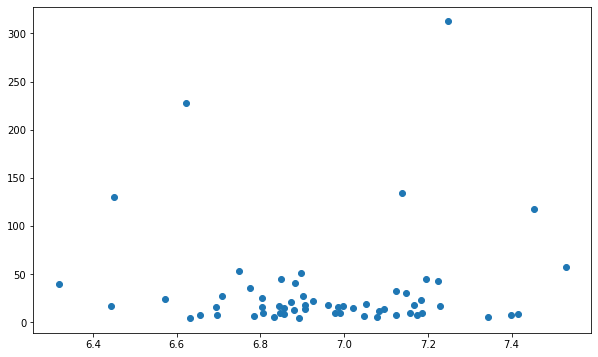

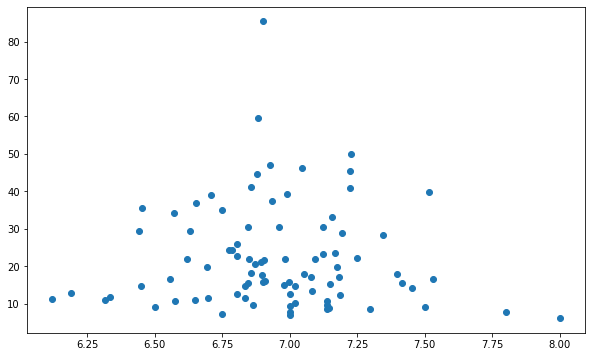

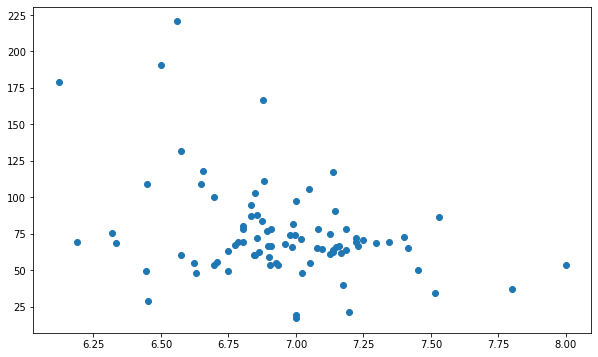

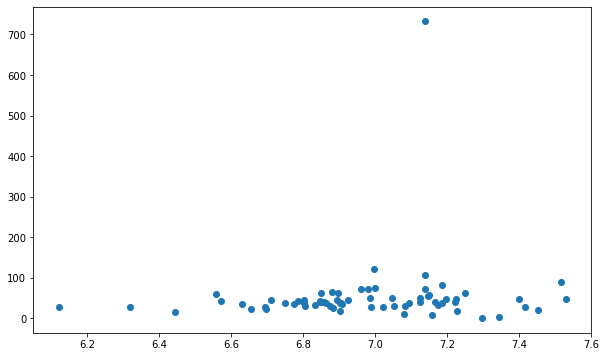

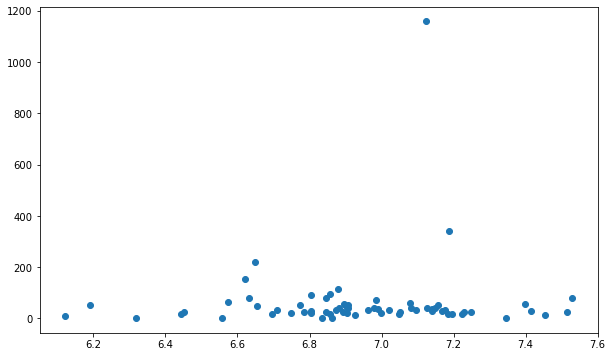

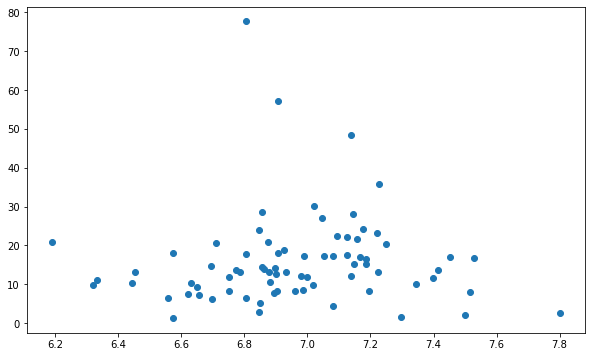

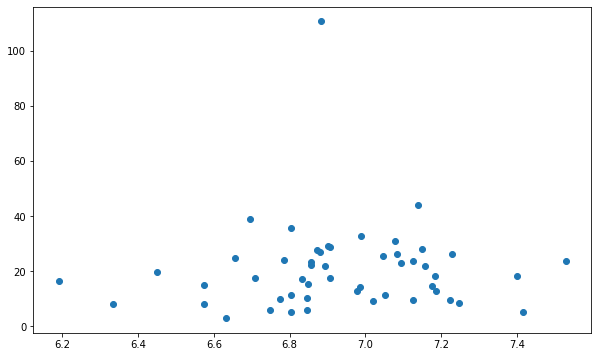

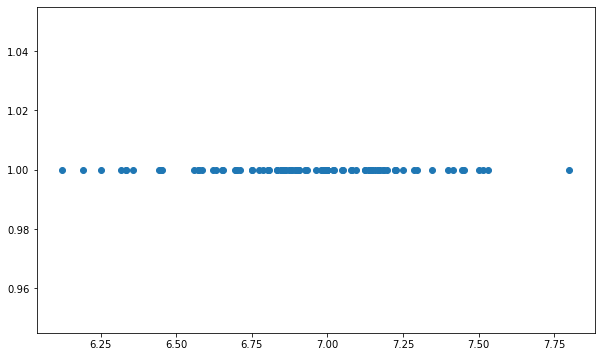

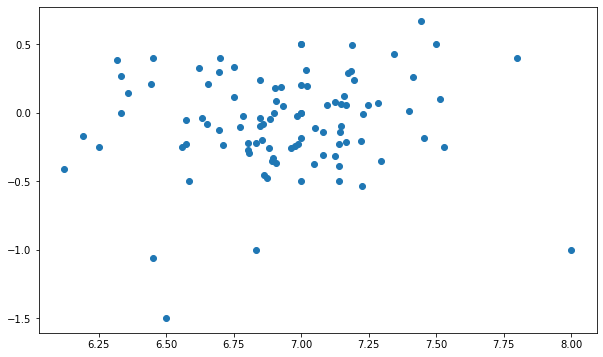

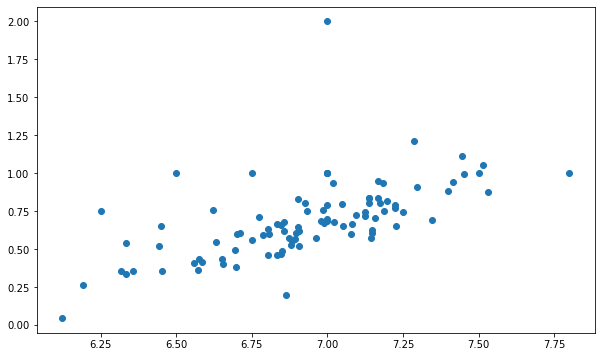

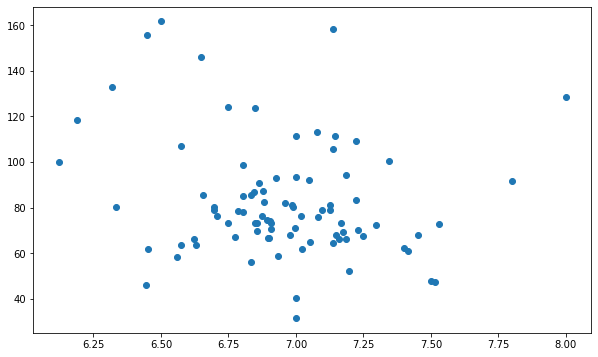

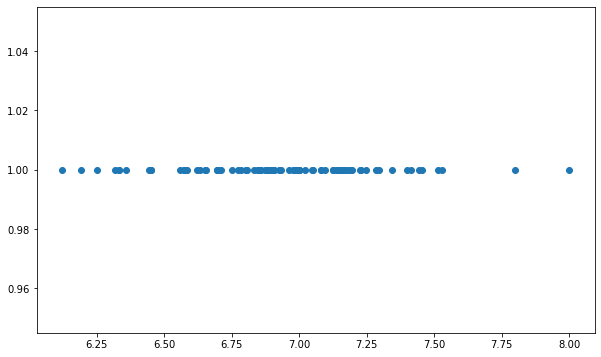

In [20]:
for var in df.columns:
    if var != 'mood':
        plt.figure(figsize=(10,6))
        plt.scatter(df.mood, df.loc[:,var])
        plt.savefig('/Users/jerryliu/jerry_jupyter/DM/photoes/var_var/'+var+'_mood'+'.jpg')
    

In [22]:
dataset = df
values = dataset.values
# ensure all data is float
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [58]:
#calculate pearson correlation
def get_carr(x):
    return df.mood.corr(x)

In [60]:
result = df.apply(get_carr)
result[np.abs(result)>0.3]

activity              0.340486
appCat.builtin        0.340642
appCat.social        -0.356235
circumplex.valence    0.607345
mood                  1.000000
dtype: float64

# correlation within patient

In [405]:
df_p = pd.read_csv('merged_per_day_per_pat.csv')
df_p.index= pd.to_datetime(df_p.time)
df_p.drop('time',axis=1, inplace = True)
def get_corre(A):
    A = A.drop('id', axis = 1)
    col =A.columns
    empt = pd.DataFrame(np.array([np.nan]*A.shape[1]).reshape(1,A.shape[1]))
    empt.columns = col
    
    for var in A.columns:
        corr_num =A.loc[:,var].corr(A.mood)
        empt.loc[:,var] = corr_num
    return empt

df_p.groupby('id').apply(get_corre)
    

/Users/jerryliu/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/jerryliu/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
id,,,,,,,,,,,,,,,,,,,,
AS14.01,0,-0.233544,-0.117477,0.090133,0.156077,0.457505,-0.447407,-0.118073,-0.103233,0.106192,-0.161064,-0.150167,-0.098737,NaN,NaN,-0.241938,0.801723,1.0,0.206425,NaN
AS14.02,0,-0.099492,0.168170,0.131172,-0.031270,NaN,NaN,NaN,0.115906,0.019045,0.304512,NaN,0.569469,NaN,NaN,0.201926,0.746200,1.0,-0.020637,NaN
AS14.03,0,0.251207,0.039960,-0.160475,-0.007379,0.042678,NaN,-0.142741,-0.138047,0.295740,-0.400438,-0.058557,-0.256774,-1.000000,NaN,0.274311,0.575380,1.0,-0.271505,NaN
AS14.05,0,0.309348,-0.354947,-0.297536,-0.378871,NaN,NaN,NaN,0.099208,-0.405935,NaN,-0.180358,-0.606933,NaN,NaN,0.467819,0.894384,1.0,-0.376401,NaN
AS14.06,0,0.038764,-0.121355,-0.144619,0.233881,NaN,0.319726,0.031596,-0.038852,0.198575,0.057075,NaN,NaN,0.087610,NaN,0.594228,0.698422,1.0,0.016167,NaN
AS14.07,0,-0.040471,0.136012,-0.237694,-0.292287,NaN,NaN,NaN,0.022574,-0.149642,-0.047256,0.028466,-0.101081,NaN,NaN,0.426843,0.876186,1.0,-0.304539,NaN
AS14.08,0,0.257973,-0.112201,-0.100624,-0.197412,NaN,NaN,-0.196989,-0.042337,-0.310961,-0.575761,-0.429277,-0.027619,NaN,NaN,0.383207,0.827376,1.0,-0.030826,NaN
AS14.09,0,0.333822,0.033977,0.305018,-0.004438,-0.117391,-1.000000,-0.246535,0.121817,-0.117647,0.288766,0.066431,0.330337,-0.173745,NaN,0.156596,0.844687,1.0,0.248394,NaN
AS14.12,0,0.163116,-0.228464,-0.174504,0.109370,-0.205136,-0.243362,-0.429349,0.245701,-0.292578,0.161560,NaN,-0.302506,-0.556356,NaN,0.041374,0.808420,1.0,-0.173657,NaN


# undersample the time series data

In [553]:
# merge the data in all pertients per time slot.
df = pd.read_csv('/Users/jerryliu/Documents/Vu_uva/p5/data_mining/assignment1/dataset_mood_smartphone.csv')
df.index = pd.to_datetime(df.time)
df.drop(['time','Unnamed: 0'],axis = 1, inplace = True)
df.reset_index(inplace = True)
df = df.groupby(['time','variable']).mean().unstack(1)
df.columns = df.columns.map(lambda x:x[1])
df

,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
time,,,,,,,,,,,,,,,,,,,
2014-02-17 07:00:52.197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2014-02-17 07:12:13.631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2014-02-17 07:49:19.635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2014-02-17 08:57:16.313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2014-02-17 08:58:58.471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-08 11:03:34.453,NaN,44.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-08 11:04:20.233,NaN,16.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-08 11:04:36.299,NaN,10.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [554]:
def get_na(x):
    ''' get how many data in each col is not na'''
    return sum(x.notnull()) / x.shape[0]

df = df['2014-3-20 00:00:00':'2014-5-01 00:00:00']
df = df.resample('1D').mean()

df.loc[:,['mood','activity','appCat.builtin','appCat.social','circumplex.valence']].apply(get_na)

mood                  1.000000
activity              1.000000
appCat.builtin        0.976744
appCat.social         0.976744
circumplex.valence    1.000000
dtype: float64

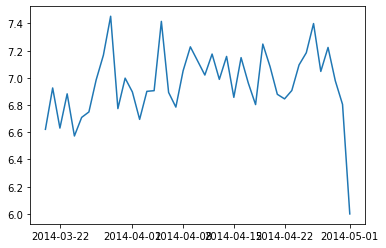

In [555]:
# fix the missing values and get rid of outliers
df = df.fillna(method = 'ffill').fillna(method = 'bfill')
#plt.plot(df.mood)
plt.plot(df.loc[:,'mood'])

In [556]:
df.loc[:,['mood','activity','appCat.builtin','appCat.social']].apply(get_na)

mood              1.0
activity          1.0
appCat.builtin    1.0
appCat.social     1.0
dtype: float64

In [557]:
df.shape

(43, 19)

In [558]:
a= list(df.columns)
a.remove('mood')
a.insert(0,'mood')
df = pd.DataFrame(df, columns= a)


In [559]:
df = pd.DataFrame(df, columns=['mood','activity','appCat.builtin','appCat.social','circumplex.valence'])


## build the model

In [561]:
import tools
import importlib
importlib.reload(tools)

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
                cols.append(df.shift(i))
                names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
                cols.append(df.shift(-i))
                if i == 0:
                        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
                else:
                        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
                agg.dropna(inplace=True)
        return agg
    
dataset = df
values = dataset.values
# ensure all data is float
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_days =1
n_features = 5
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.shape)

(42, 10)


In [545]:
index_list = tools.split_data(df = reframed, time_interval='0.5H')

2005
48
# of instances are: 2005
how many step length you want:1
maximum testing number:1717
number of validation :1
[(240, 288)]


  0%|          | 0/36 [00:00<?, ?it/s]

total number of testing: 36
mse pre vs ac:0.2751595
mse ben vs ac:0.73819226

mse of mean this time:0.0001347264
mse of mean this time:0.014287811


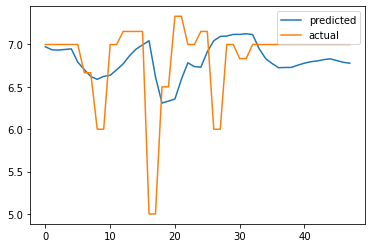

  3%|▎         | 1/36 [00:04<02:35,  4.44s/it]

mse pre vs ac:0.19163127
mse ben vs ac:0.70264417

mse of mean this time:0.0013081658
mse of mean this time:0.09631768


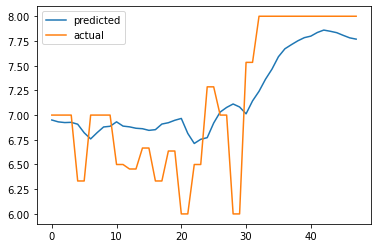

  6%|▌         | 2/36 [00:09<02:34,  4.54s/it]

mse pre vs ac:0.44495344
mse ben vs ac:0.850915

mse of mean this time:0.016251523
mse of mean this time:0.00033386316


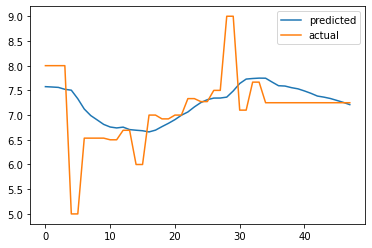

  8%|▊         | 3/36 [00:16<02:54,  5.28s/it]

mse pre vs ac:0.5544234
mse ben vs ac:1.1608593

mse of mean this time:0.07978566
mse of mean this time:0.08621165


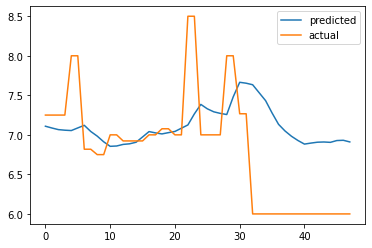

 11%|█         | 4/36 [00:20<02:42,  5.09s/it]

mse pre vs ac:0.72731906
mse ben vs ac:1.3129162

mse of mean this time:0.07462888
mse of mean this time:0.052327976


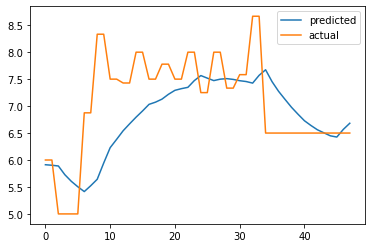

 14%|█▍        | 5/36 [00:25<02:31,  4.87s/it]

mse pre vs ac:0.18897085
mse ben vs ac:0.984346

mse of mean this time:0.00025305696
mse of mean this time:0.04413407


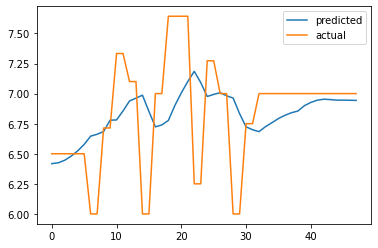

 17%|█▋        | 6/36 [00:29<02:22,  4.74s/it]

mse pre vs ac:0.2417004
mse ben vs ac:0.6952593

mse of mean this time:0.031044224
mse of mean this time:0.0026429594


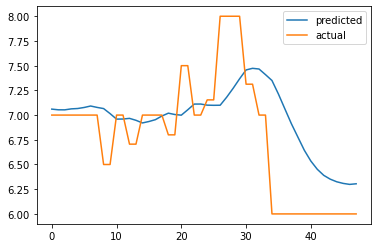

 19%|█▉        | 7/36 [00:34<02:16,  4.70s/it]

mse pre vs ac:0.11811695
mse ben vs ac:0.29683194

mse of mean this time:0.0010653995
mse of mean this time:0.0064148735


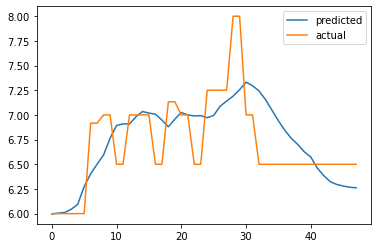

 22%|██▏       | 8/36 [00:40<02:21,  5.04s/it]

mse pre vs ac:0.18829657
mse ben vs ac:0.2842233

mse of mean this time:4.1022446e-05
mse of mean this time:0.00024207376


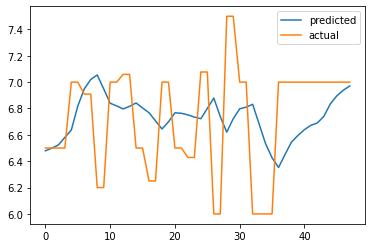

 25%|██▌       | 9/36 [00:44<02:11,  4.89s/it]

mse pre vs ac:1.0865078
mse ben vs ac:2.7087047

mse of mean this time:0.19816437
mse of mean this time:0.30973095


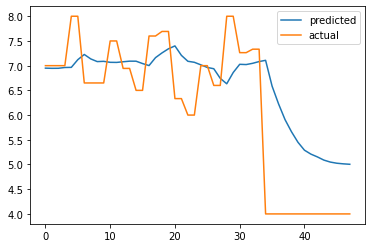

 28%|██▊       | 10/36 [00:48<02:02,  4.72s/it]

mse pre vs ac:0.5816955
mse ben vs ac:5.805168

mse of mean this time:0.03968754
mse of mean this time:0.5638462


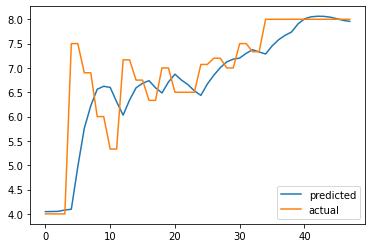

 31%|███       | 11/36 [00:54<02:04,  4.99s/it]

mse pre vs ac:0.23842005
mse ben vs ac:2.2643993

mse of mean this time:0.013025662
mse of mean this time:0.17263801


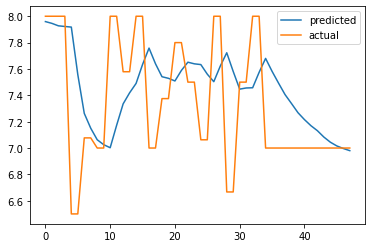

 33%|███▎      | 12/36 [00:58<01:54,  4.79s/it]

mse pre vs ac:0.6329413
mse ben vs ac:1.5065665

mse of mean this time:0.051941466
mse of mean this time:0.76214504


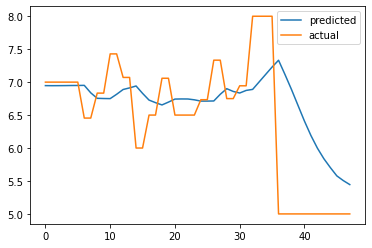

 36%|███▌      | 13/36 [01:03<01:48,  4.72s/it]

mse pre vs ac:0.27110812
mse ben vs ac:1.6170658

mse of mean this time:0.031356707
mse of mean this time:0.09648083


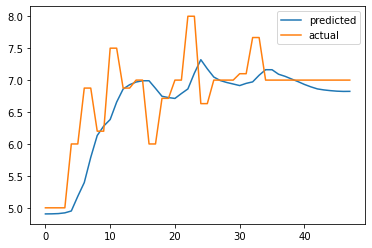

 39%|███▉      | 14/36 [01:08<01:47,  4.87s/it]

mse pre vs ac:0.29108086
mse ben vs ac:0.9013249

mse of mean this time:0.016651753
mse of mean this time:0.2612513


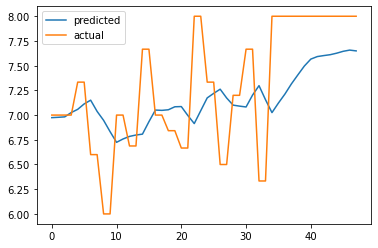

 42%|████▏     | 15/36 [01:14<01:45,  5.04s/it]

mse pre vs ac:0.17760657
mse ben vs ac:0.47503826

mse of mean this time:0.006189873
mse of mean this time:0.050993193


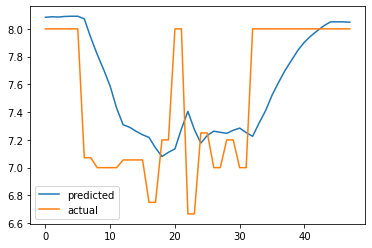

 44%|████▍     | 16/36 [01:18<01:36,  4.83s/it]

mse pre vs ac:0.2370596
mse ben vs ac:0.5216497

mse of mean this time:0.02008748
mse of mean this time:0.07296283


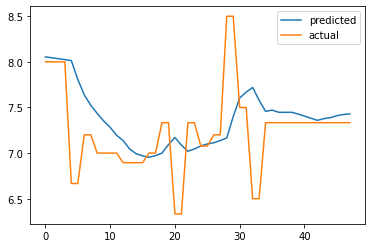

 47%|████▋     | 17/36 [01:22<01:28,  4.66s/it]

mse pre vs ac:0.18725866
mse ben vs ac:0.25725654

mse of mean this time:0.013526269
mse of mean this time:0.035744485


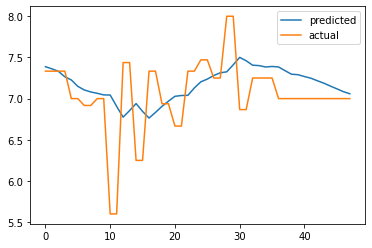

 50%|█████     | 18/36 [01:26<01:21,  4.51s/it]

mse pre vs ac:0.10713297
mse ben vs ac:0.27911234

mse of mean this time:0.00043347827
mse of mean this time:0.011859017


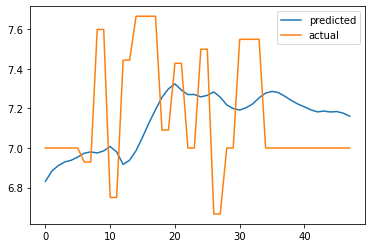

 53%|█████▎    | 19/36 [01:32<01:24,  4.97s/it]

mse pre vs ac:0.51382715
mse ben vs ac:0.549388

mse of mean this time:0.0014230656
mse of mean this time:0.027855504


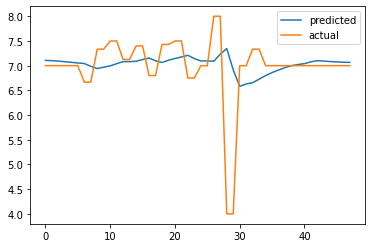

 56%|█████▌    | 20/36 [01:37<01:18,  4.91s/it]

mse pre vs ac:0.42929998
mse ben vs ac:0.81183386

mse of mean this time:1.193485e-05
mse of mean this time:2.6633945e-05


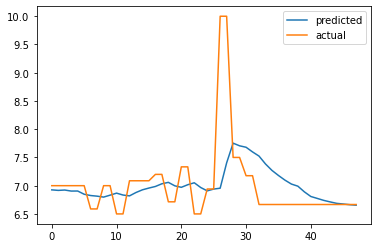

 58%|█████▊    | 21/36 [01:43<01:17,  5.19s/it]

mse pre vs ac:0.38055077
mse ben vs ac:1.0131463

mse of mean this time:0.029039621
mse of mean this time:0.013873189


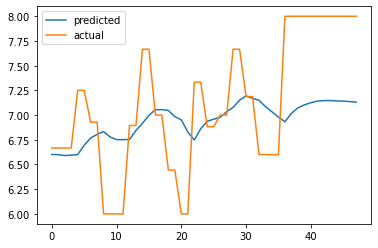

 61%|██████    | 22/36 [01:48<01:11,  5.12s/it]

mse pre vs ac:0.23657031
mse ben vs ac:0.8446749

mse of mean this time:0.0004966843
mse of mean this time:0.000955547


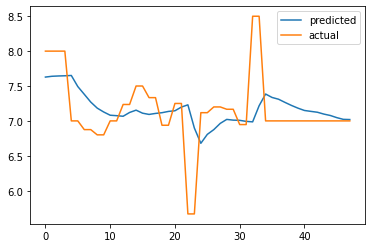

 64%|██████▍   | 23/36 [01:53<01:07,  5.16s/it]

mse pre vs ac:0.3635341
mse ben vs ac:0.6121433

mse of mean this time:0.013415029
mse of mean this time:0.005941071


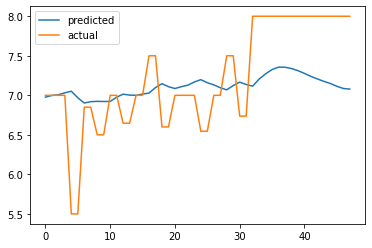

 67%|██████▋   | 24/36 [01:58<00:59,  4.94s/it]

mse pre vs ac:0.5218384
mse ben vs ac:1.2292889

mse of mean this time:0.08688893
mse of mean this time:0.12033365


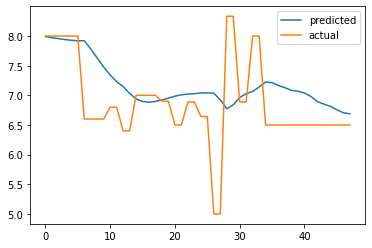

 69%|██████▉   | 25/36 [02:03<00:55,  5.00s/it]

mse pre vs ac:0.20029247
mse ben vs ac:0.7238097

mse of mean this time:0.012438583
mse of mean this time:0.060870208


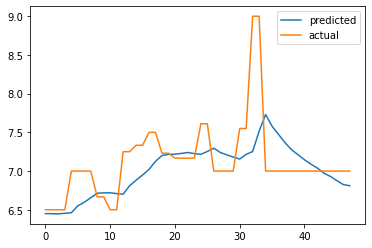

 72%|███████▏  | 26/36 [02:07<00:48,  4.83s/it]

mse pre vs ac:0.2961618
mse ben vs ac:0.7936761

mse of mean this time:0.0053308033
mse of mean this time:0.10177332


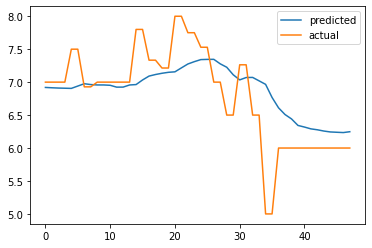

 75%|███████▌  | 27/36 [02:13<00:46,  5.11s/it]

mse pre vs ac:0.30764714
mse ben vs ac:0.8821149

mse of mean this time:0.008493595
mse of mean this time:0.005314801


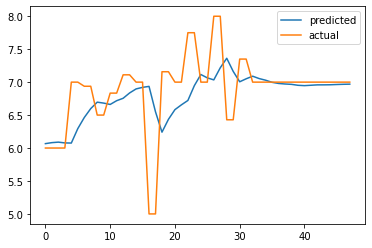

 78%|███████▊  | 28/36 [02:19<00:41,  5.24s/it]

mse pre vs ac:0.3809339
mse ben vs ac:0.6483651

mse of mean this time:0.0063149
mse of mean this time:0.020793047


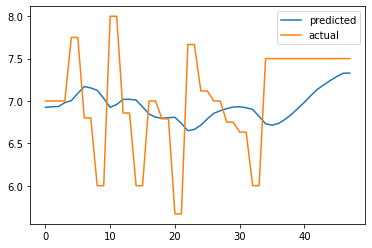

 81%|████████  | 29/36 [02:23<00:35,  5.12s/it]

mse pre vs ac:0.24095522
mse ben vs ac:0.45497516

mse of mean this time:0.024158435
mse of mean this time:0.0017901966


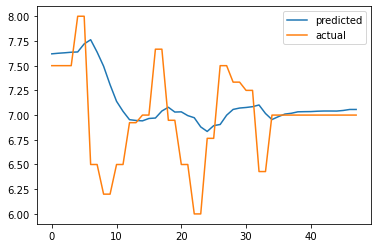

 83%|████████▎ | 30/36 [02:28<00:30,  5.10s/it]

mse pre vs ac:0.36976472
mse ben vs ac:0.81824034

mse of mean this time:0.07303704
mse of mean this time:0.20687178


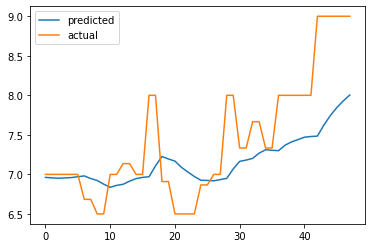

 86%|████████▌ | 31/36 [02:33<00:25,  5.06s/it]

mse pre vs ac:0.48457766
mse ben vs ac:0.7463351

mse of mean this time:0.0025603652
mse of mean this time:0.07818611


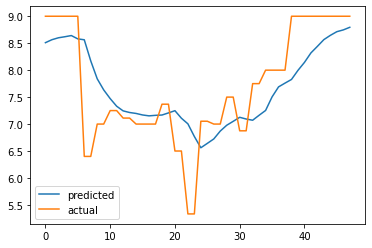

 89%|████████▉ | 32/36 [02:39<00:21,  5.30s/it]

mse pre vs ac:0.94487447
mse ben vs ac:2.6805642

mse of mean this time:0.36066166
mse of mean this time:0.28234816


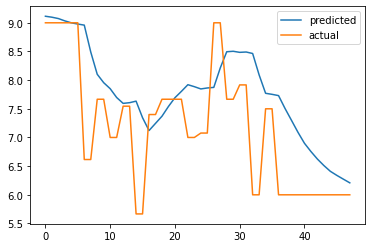

 92%|█████████▏| 33/36 [02:45<00:15,  5.30s/it]

mse pre vs ac:0.4546957
mse ben vs ac:3.3655694

mse of mean this time:0.028431937
mse of mean this time:0.050957236


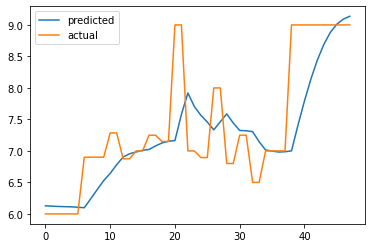

 94%|█████████▍| 34/36 [02:50<00:10,  5.28s/it]

mse pre vs ac:0.28588545
mse ben vs ac:1.5625224

mse of mean this time:0.009451717
mse of mean this time:0.002609141


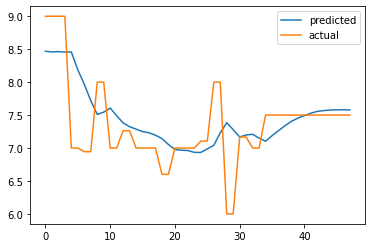

 97%|█████████▋| 35/36 [02:56<00:05,  5.59s/it]

mse pre vs ac:0.21685874
mse ben vs ac:0.7164213

mse of mean this time:0.014328422
mse of mean this time:0.17508514


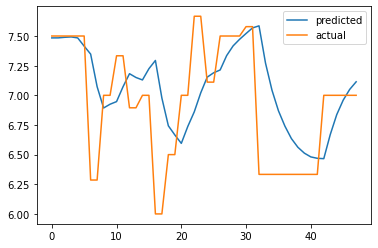

100%|██████████| 36/36 [03:01<00:00,  5.05s/it]




mean MSE preVSac: 0.03533499953303792
MSE benVSac:0.10544859912506707


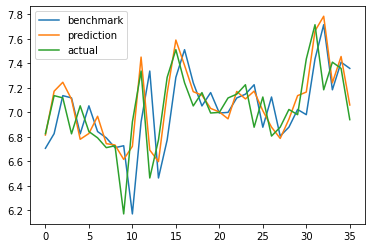

In [452]:
tools.run_model(in_list=index_list, equal_train = True, reframed=reframed, n_days = n_days, n_features=n_features, validation_split=0, verbose=0, scal=scaler)

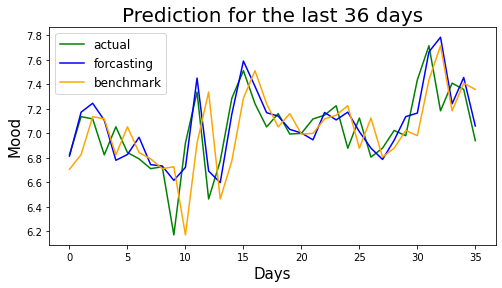

In [530]:
# graphs
re = pd.read_csv('prediction_mean_36days.csv')
#re.index = df.resample('1D').mean().index[-36:]
a = df.resample('1D').mean().reset_index().time.dt.strftime('%y-%m-%d')[-36:]

#a = list(a.map(lambda x:'-'.join(x.split('-')[1:])))
want = a[::5]
#for  i in range(len(a)):
#    if a[i] not in want:
#        a[i] = None
#    else:pass


#index[-36:].dt.strftime('%M-%D')
plt.figure(figsize = (8,4))
plt.plot(re.actual, label = 'actual',color = 'green')
plt.plot(re.prediction, label = 'forcasting', color = 'blue')
plt.plot(re.benchmark, label = 'benchmark', color = 'orange')
plt.legend(fontsize = 12)
plt.title('Prediction for the last 36 days', fontsize = 20)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Mood', fontsize = 15)
plt.savefig("/Users/jerryliu/jerry_jupyter/DM/evaluation.png")

In [564]:

# split into train and test sets
values = reframed.values
n_train_days = 30
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [565]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
#test_X.shape

(30, 1, 5) (30,) (12, 1, 5) (12,)


Epoch 1/100
1/1 - 2s - loss: 0.6840 - val_loss: 0.6603
Epoch 2/100
1/1 - 0s - loss: 0.6741 - val_loss: 0.6499
Epoch 3/100
1/1 - 0s - loss: 0.6642 - val_loss: 0.6399
Epoch 4/100
1/1 - 0s - loss: 0.6542 - val_loss: 0.6308
Epoch 5/100
1/1 - 0s - loss: 0.6443 - val_loss: 0.6216
Epoch 6/100
1/1 - 0s - loss: 0.6343 - val_loss: 0.6125
Epoch 7/100
1/1 - 0s - loss: 0.6243 - val_loss: 0.6032
Epoch 8/100
1/1 - 0s - loss: 0.6142 - val_loss: 0.5940
Epoch 9/100
1/1 - 0s - loss: 0.6042 - val_loss: 0.5847
Epoch 10/100
1/1 - 0s - loss: 0.5941 - val_loss: 0.5754
Epoch 11/100
1/1 - 0s - loss: 0.5839 - val_loss: 0.5661
Epoch 12/100
1/1 - 0s - loss: 0.5737 - val_loss: 0.5566
Epoch 13/100
1/1 - 0s - loss: 0.5635 - val_loss: 0.5472
Epoch 14/100
1/1 - 0s - loss: 0.5532 - val_loss: 0.5376
Epoch 15/100
1/1 - 0s - loss: 0.5428 - val_loss: 0.5280
Epoch 16/100
1/1 - 0s - loss: 0.5324 - val_loss: 0.5184
Epoch 17/100
1/1 - 0s - loss: 0.5219 - val_loss: 0.5086
Epoch 18/100
1/1 - 0s - loss: 0.5113 - val_loss: 0.4988
E

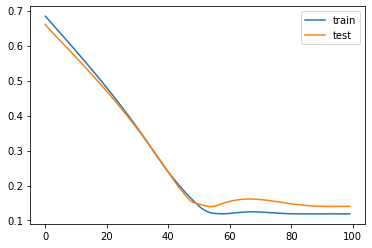

In [567]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
#history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_split = 0.0, verbose=2, shuffle=False)


# plot history
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()




In [568]:
result = model.evaluate(test_X, test_y, batch_size = 72) 
print(result)

1/1 [==============================] - 0s 22ms/step - loss: 0.1405
0.14045904576778412


In [569]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('MSE: %.3f' % mean_squared_error(inv_y, inv_yhat)) 
print('Test RMSE: %.3f' % rmse)

MSE: 0.078
Test RMSE: 0.280


In [419]:
x = input('hi')

hi


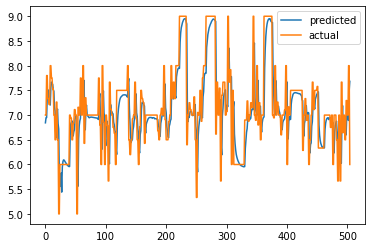

In [551]:
plt.plot(inv_yhat, label = 'predicted')
plt.plot(inv_y, label = 'actual')
plt.legend()
plt.show()

## statisitcal analysis

In [570]:
#result = pd.read_csv('/Users/jerryliu/Downloads/actual-pred-bench.csv')

#result = pd.DataFrame(result.values, columns=['time','actual','prediction','benchmark'])
result = pd.read_csv('/Users/jerryliu/jerry_jupyter/DM/prediction_mean.csv')
result

,Unnamed: 0,actual,prediction,benchmark
0,0,6.824787,6.840405,6.705255
1,0,6.792444,6.772798,6.820300
2,0,6.772637,6.793091,6.897971
3,0,7.072637,7.068583,6.824787
4,0,7.124026,7.222221,6.831731
...,...,...,...,...
95,0,7.019887,7.046406,7.116643
96,0,7.434570,7.241187,6.979738
97,0,7.702925,7.475202,6.946301
98,0,7.618701,7.274038,6.990621


In [571]:
# get absolute distance between actual-pre; actual-benchmark
from decimal import Decimal
def get_dis(line):
    dis_ac_pre = 100 * (np.abs(line.actual - line.prediction))/line.actual
    dis_ac_ben = 100 * (np.abs(line.actual - line.benchmark))/line.actual
    if dis_ac_ben == 0:
        dis_ac_ben = round(Decimal(1e-1),5)
    if dis_ac_pre == 0:
        dis_ac_pre = round(Decimal(1e-1),5)
    return [float(dis_ac_pre), float(dis_ac_ben)]



dis = result.apply(get_dis, axis = 1)

In [572]:
dis.map(lambda x:float(x[1]))

0     1.751434
1     0.410101
2     1.850591
3     3.504357
4     4.102940
        ...   
95    1.378312
96    6.117793
97    9.822551
98    8.243929
99    5.245112
Length: 100, dtype: float64

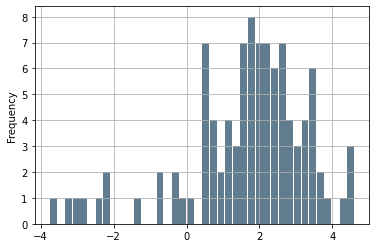

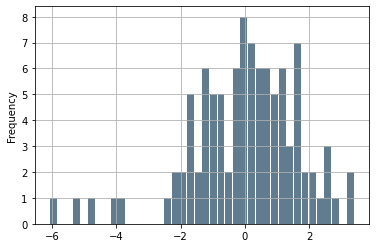

In [573]:
#a = pd.Series(dis.map(lambda x:x[0]))
#a.plot.hist(grid=True, bins=20, rwidth=0.9,
#                  color='#607c8e')
plt.figure()
item = dis.map(lambda x:math.log2(x[1]) )
b = pd.Series(item)
b.plot.hist(grid=True, bins=40, rwidth=0.9,color='#607c8e')

plt.figure()
b = pd.Series(dis.map(lambda x:math.log2(x[0]) ))
b.plot.hist(grid=True, bins=40, rwidth=0.9,color='#607c8e')

In [576]:
# the variance of first column
dist_1 = dis.map(lambda x:math.log(x[0]))
print(np.var(dist_1))
# var of second column

dist_2 =dis.map(lambda x:math.log(x[1]))
print(np.var(dist_2))

1.3860255687624365
1.361288012568802


In [589]:
c1 = np.array(dist_1).reshape(len(dist_1),1)
c2 = np.array(dist_2).reshape(len(dist_2),1)
print(c1[0,:])
print(c2[0,:])
np.concatenate([c1,c2],axis = 1)[0]

[-1.47473185]
[0.56043486]


array([-1.47473185,  0.56043486])

In [590]:
data = pd.DataFrame(np.concatenate([c1,c2],axis = 1), columns=['dis_ac_pre','dis_ac_ben'])
data.to_csv('prediction_mean_porcessed.csv')

In [577]:
# test if the variances of two columnes are equal
stats.levene(dist_1, dist_2)

LeveneResult(statistic=0.09418546135660182, pvalue=0.7592446680012306)

In [578]:
# since they are very close, we do a t-test
from scipy import stats
np.random.seed(12345678)
stats.ttest_ind(dist_1,dist_2)

Ttest_indResult(statistic=-7.029609209755362, pvalue=3.27447149741016e-11)

In [645]:
%matplotlib
fig, ax = plt.subplots()

data.plot.kde(ax=ax, legend=False, linewidth = 4, color = ['blue', 'red'])
data.plot.hist(density=True, ax=ax, bins = 19, alpha = 0.5)
plt.legend(['Ac vs Pre','Ac vs Bench'], fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('log difference', fontsize = 15)
ax.grid(axis='y')
ax.set_facecolor('beige')

#plt.savefig("/Users/jerryliu/jerry_jupyter/DM/Hitgram_LSTM.png", figsize = (10,5))

Using matplotlib backend: MacOSX


### model 1

In [663]:
result = pd.read_csv('/Users/jerryliu/Downloads/actual-pred-bench-test.csv')
result = pd.DataFrame(result.values, columns=['time','actual','prediction','benchmark'])

In [664]:
len(result)

49

In [665]:
dis_m = result.apply(get_dis, axis = 1)
dist_1_m = dis_m.map(lambda x:math.log(x[0]))
print(np.var(dist_1_m))
# var of second column

dist_2_m =dis_m.map(lambda x:math.log(x[1]))
print(np.var(dist_2_m))

1.4073995970653146
3.124044250310219


In [666]:
c1 = np.array(dist_1_m).reshape(len(dist_1_m),1)
c2 = np.array(dist_2_m).reshape(len(dist_2_m),1)
np.concatenate([c1,c2],axis = 1)[0]

array([1.90277193, 2.52572864])

In [667]:
%matplotlib
data_m = pd.DataFrame(np.concatenate([c1,c2],axis = 1), columns=['dis_ac_pre','dis_ac_ben'])

fig, ax = plt.subplots()

data_m.plot.kde(ax=ax, legend=False, linewidth = 4, color = ['blue', 'red'])
data_m.plot.hist(density=True, ax=ax, bins = 19, alpha = 0.5)
plt.legend(['Ac vs Pre','Ac vs Bench'], fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('log difference', fontsize = 15)
ax.grid(axis='y')
ax.set_facecolor('beige')
#plt.savefig("/Users/jerryliu/jerry_jupyter/DM/Hitgram_aggre.png", figsize = (10,5))

Using matplotlib backend: MacOSX


In [657]:
plt.figure()
#item = dis_.map(lambda x:math.log2(x[1]) )

dist_1_m.plot.hist(grid=True, bins=40, rwidth=0.9,color='#607c8e')
#plt.show()
plt.figure()
#b = pd.Series(dis.map(lambda x:math.log2(x[0]) ))
dist_2_m.plot.hist(grid=True, bins=40, rwidth=0.9,color='#607c8e')

# undersample for single patient

In [141]:
df = pd.read_csv('/Users/jerryliu/Documents/Vu_uva/p5/data_mining/assignment1/dataset_mood_smartphone.csv')
df.index = pd.to_datetime(df.time)
df.drop(['time','Unnamed: 0'],axis = 1, inplace = True)
df.reset_index(inplace = True)
df = df.groupby(['id','time','variable']).mean().unstack(2)
df.columns = df.columns.map(lambda x:x[1])
df.reset_index([0], inplace = True)

#get data for the patient AS14.01
df_p1 = df[df.id == 'AS14.01'].sort_index()
df_p1

,id,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
time,,,,,,,,,,,,,,,,,,,,
2014-02-17 12:04:42.394,AS14.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2014-02-17 18:28:25.520,AS14.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2014-02-18 09:29:51.257,AS14.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2014-02-19 14:43:30.575,AS14.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2014-02-19 17:29:10.378,AS14.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-05 09:41:40.795,AS14.01,NaN,3.423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-05 09:41:44.243,AS14.01,NaN,1.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-05 09:41:45.292,AS14.01,NaN,12.049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
def get_na(x):
    ''' get how many data in each col is not na'''
    return sum(x.notnull()) / x.shape[0]

df_p1 = df_p1['2014-3-20 00:00:00':'2014-5-01 00:00:00']
df_p1 = df_p1.resample('1H').mean()

df_p1.loc[:,['mood','activity','appCat.builtin','appCat.social','circumplex.valence']].apply(get_na)

mood                  0.195391
activity              0.954910
appCat.builtin        0.638277
appCat.social         0.296593
circumplex.valence    0.184369
dtype: float64

In [143]:
#plt.plot(df_p1.mood)

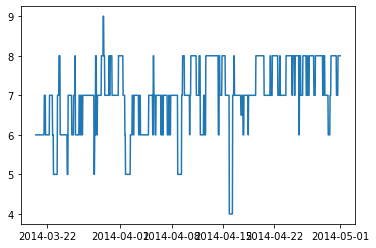

In [144]:
# fix the missing values and get rid of outliers
df_p1 = df_p1.fillna(method = 'ffill').fillna(method = 'bfill')
#plt.plot(df.mood)
plt.plot(df_p1.loc[:,'mood'])

In [145]:
df_p1 = pd.DataFrame(df_p1, columns=['mood','activity','appCat.builtin','appCat.social','circumplex.valence'])

In [146]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
                cols.append(df.shift(i))
                names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
                cols.append(df.shift(-i))
                if i == 0:
                        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
                else:
                        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
                agg.dropna(inplace=True)
        return agg
    
dataset = df_p1
values = dataset.values
# ensure all data is float
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_days = 6
n_features = 5
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.shape)

(992, 35)


In [147]:
# split into train and test sets
values = reframed.values
n_train_days = 50
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [148]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
#test_X.shape

(50, 6, 5) (50,) (942, 6, 5) (942,)


Epoch 1/50
1/1 - 2s - loss: 0.5461 - val_loss: 0.6913
Epoch 2/50
1/1 - 0s - loss: 0.5210 - val_loss: 0.6612
Epoch 3/50
1/1 - 0s - loss: 0.4964 - val_loss: 0.6316
Epoch 4/50
1/1 - 0s - loss: 0.4721 - val_loss: 0.6028
Epoch 5/50
1/1 - 0s - loss: 0.4482 - val_loss: 0.5743
Epoch 6/50
1/1 - 0s - loss: 0.4245 - val_loss: 0.5461
Epoch 7/50
1/1 - 0s - loss: 0.4010 - val_loss: 0.5180
Epoch 8/50
1/1 - 0s - loss: 0.3776 - val_loss: 0.4899
Epoch 9/50
1/1 - 0s - loss: 0.3541 - val_loss: 0.4616
Epoch 10/50
1/1 - 0s - loss: 0.3305 - val_loss: 0.4330
Epoch 11/50
1/1 - 0s - loss: 0.3066 - val_loss: 0.4041
Epoch 12/50
1/1 - 0s - loss: 0.2824 - val_loss: 0.3749
Epoch 13/50
1/1 - 0s - loss: 0.2576 - val_loss: 0.3450
Epoch 14/50
1/1 - 0s - loss: 0.2323 - val_loss: 0.3146
Epoch 15/50
1/1 - 0s - loss: 0.2061 - val_loss: 0.2831
Epoch 16/50
1/1 - 0s - loss: 0.1791 - val_loss: 0.2514
Epoch 17/50
1/1 - 0s - loss: 0.1521 - val_loss: 0.2200
Epoch 18/50
1/1 - 0s - loss: 0.1288 - val_loss: 0.1893
Epoch 19/50
1/1 - 0

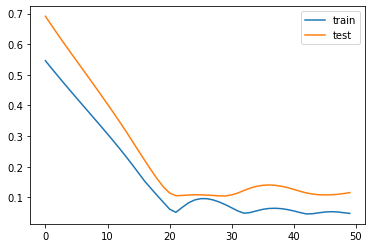

In [149]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()



In [150]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.726


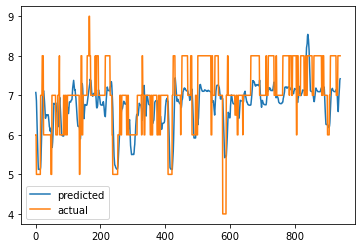

In [151]:
plt.plot(inv_yhat, label = 'predicted')
plt.plot(inv_y, label = 'actual')
plt.legend()
plt.show()